In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# List columns using inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
print('Measurement Columns')
for c in columns:
    print(c['name'], c['type'])
    
print('------------')

print('Station Columns')
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
    

Measurement Columns
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
------------
Station Columns
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"One year before 8/23/17: {one_year}")


One year before 8/23/17: 2016-08-23


In [28]:
# Convert dates to datetime
most_recent_date = dt.datetime(2017, 8, 23)
one_year = dt.datetime(2016, 8, 23)

In [29]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = [Measurement.date, Measurement.prcp]
one_year_prcp = session.query(*prcp_data).\
    filter(Measurement.date >= one_year, Measurement.date <= most_recent_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
one_year_prcp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# I assumed that the data used for precipitation was measured in mm. The 
# instructions said inches, but that doesn't really fit the scale of the
prcp_df = pd.DataFrame(one_year_prcp, columns=["date", "precipitation_(mm)"])
prcp_df = prcp_df.set_index("date")
prcp_df

,precipitation_(mm)
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


In [49]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
prcp_df

,precipitation_(mm)
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


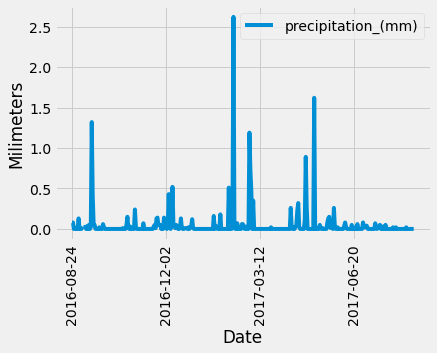

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel("Date")
plt.ylabel("Milimeters")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
prcp_df.describe()

,precipitation_(mm)
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()